In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('C:\\Users\\giannis\\Desktop\\New folder\\healthcare-dataset-stroke-data.csv')

In [4]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.shape

(5110, 12)

In [7]:
dataset.select_dtypes(include = 'object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [8]:
len(dataset.select_dtypes(include = 'object').columns)

5

In [9]:
dataset.select_dtypes(include = ['int64','float64']).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [10]:
len(dataset.select_dtypes(include = ['int64','float64']).columns)

7

In [11]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
dataset.isnull().values.any()

True

In [13]:
dataset.isnull().values.any().sum()

1

In [14]:
dataset.columns[dataset.isnull().any()]

Index(['bmi'], dtype='object')

In [15]:
len(dataset.columns[dataset.isnull().any()])

1

In [16]:
dataset['bmi'].count()

4909

In [17]:
dataset.shape

(5110, 12)

In [18]:
dataset = dataset.drop(columns = 'bmi')

In [19]:
dataset.shape

(5110, 11)

In [20]:
dataset.isnull().values.any()

False

In [21]:
#dealing with categorical data

In [22]:
dataset.select_dtypes(include = 'object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [23]:
dataset['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [24]:
dataset['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
dataset['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
dataset['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
dataset['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [28]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [29]:
#one hot encoding

In [30]:
dataset = pd.get_dummies(data = dataset,drop_first=True)

In [31]:
dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,1,0,0,1,0,0,1,0,0,0,1,0


In [32]:
dataset.shape

(5110, 17)

In [33]:
#correlation matrix

In [325]:
data2 = dataset.drop(columns='stroke')

<AxesSubplot:title={'center':'Correlation with stroke'}>

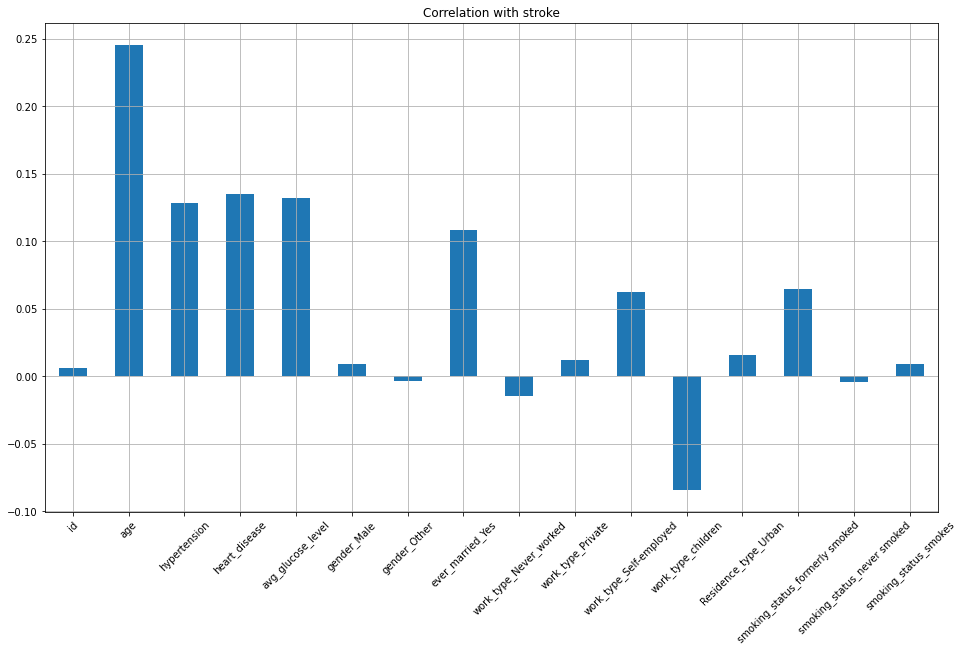

In [326]:
data2.corrwith(dataset['stroke']).plot.bar(
    figsize=(16,9), title='Correlation with stroke', rot=45, grid=True
)

In [327]:
corr = dataset.corr()

In [328]:
#heatmap

<AxesSubplot:>

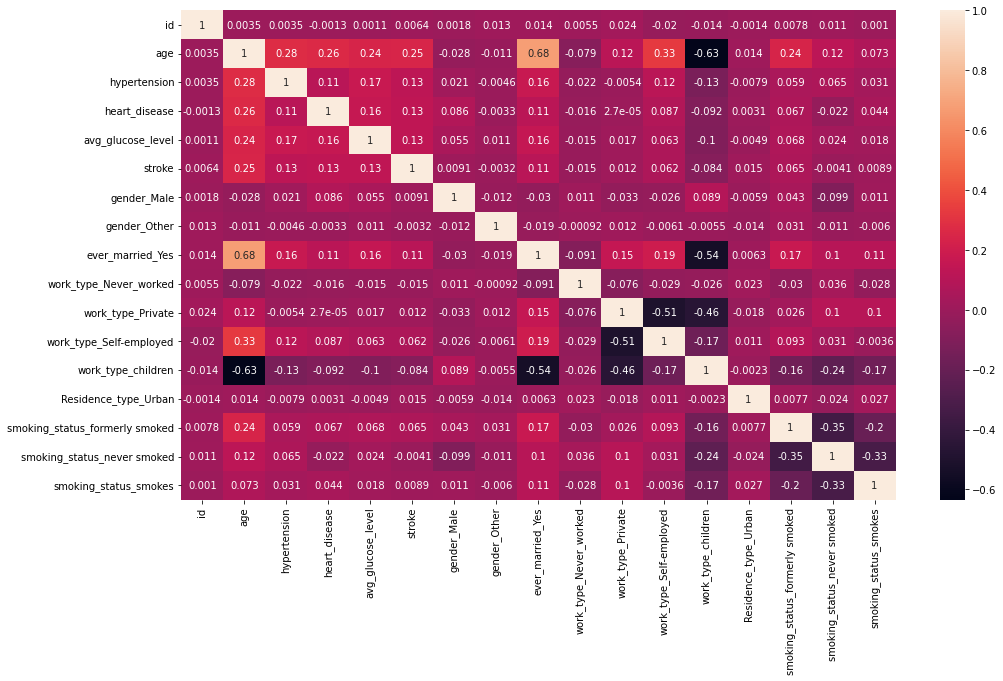

In [329]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

In [330]:
#splitting dataset

In [331]:
dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,1,0,0,1,0,0,1,0,0,0,1,0


In [348]:
x = dataset.drop(columns='work_type_children')

In [349]:
y = dataset['work_type_children']

In [350]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [351]:
x_train.shape

(2555, 16)

In [352]:
y_train.shape

(2555,)

In [353]:
x_test.shape

(2555, 16)

In [354]:
y_test.shape

(2555,)

In [355]:
#feature scaling

In [356]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [357]:
x_train

array([[-0.4411984 ,  1.04072776, -0.31901098, ..., -0.45172202,
         1.30855425, -0.43401854],
       [-1.57573686,  1.5758912 , -0.31901098, ..., -0.45172202,
        -0.76420217, -0.43401854],
       [ 0.24054135,  0.0595948 , -0.31901098, ..., -0.45172202,
         1.30855425, -0.43401854],
       ...,
       [-0.92787031,  0.01499784, -0.31901098, ..., -0.45172202,
        -0.76420217,  2.30404904],
       [ 1.69746908, -1.01073208, -0.31901098, ...,  2.21375085,
        -0.76420217, -0.43401854],
       [ 0.74265337,  0.63935519,  3.13468837, ..., -0.45172202,
         1.30855425, -0.43401854]])

In [358]:
x_test

array([[ 1.20433608,  1.70968206, -0.31901098, ..., -0.45172202,
        -0.76420217,  2.30404904],
       [-0.23130807, -1.76888028, -0.31901098, ..., -0.45172202,
        -0.76420217, -0.43401854],
       [ 1.08513852,  0.63935519, -0.31901098, ..., -0.45172202,
         1.30855425, -0.43401854],
       ...,
       [-0.07063602, -1.89196787, -0.31901098, ..., -0.45172202,
        -0.76420217, -0.43401854],
       [ 0.88527237, -0.16338997, -0.31901098, ..., -0.45172202,
         1.30855425, -0.43401854],
       [ 0.83481888, -1.23371685, -0.31901098, ..., -0.45172202,
         1.30855425, -0.43401854]])

In [359]:
#multiple linear regression

In [360]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [361]:
y_pred = regressor_lr.predict(x_test)

In [362]:
from sklearn.metrics import  r2_score

In [363]:
r2_score(y_test, y_pred)

0.6863476145930216

In [364]:
#random forest regression

In [365]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [366]:
y_pred = regressor_rf.predict(x_test)

In [367]:
r2_score(y_test, y_pred)

0.9719999648913387

In [368]:
#xgboost classifier

In [369]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=12,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [370]:
y_pred = regressor_xgb.predict(x_test)

In [371]:
r2_score(y_test, y_pred)

0.9743699245313742

In [372]:
#random predictions

In [373]:
dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,1,0,0,1,0,0,1,0,0,0,1,0
